In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

df = pd.read_parquet("data/bergingspercentage_rucphen_parquet/RUC0011_WTH_RIO.Bergingspercentage.parquet")
df_metadata = pd.read_parquet("data/bergingspercentage_rucphen_parquet/RUC0011_WTH_RIO.Bergingspercentage.metadata.parquet")

In [2]:
df.head()

,Date,Time,Value [m³/h]
0,01-01-2018,00:00:00,100.0
1,01-01-2018,00:05:00,100.0
2,01-01-2018,00:10:00,100.0
3,01-01-2018,00:15:00,100.0
4,01-01-2018,00:20:00,100.0


In [3]:
df_metadata.head(15)

,Key,Value
0,Station Site,Kenbelstraat
1,Station Name,Niveau Riool
2,Station Number,RUC0011_WTH_RIO
3,LocalX,99486
4,LocalY,396923
6,Parameter Name,Bergingspercentage
7,Parameter Type,WNS12107
8,Parameter Type Name,WATHTE [%] [PLAATSLR] [AW]
9,Time series Name,ContinueBerekening.F
10,Time series Unit,m³/h


In [4]:
# Data cleaning/preperation
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d-%m-%Y %H:%M:%S")
df.drop(columns= 'Date', inplace= True)

# Rename columns
df = df.rename(columns={'Value [m³/h]': 'percentage'})
# Define the desired order of columns
desired_order = ['timestamp', 'percentage']

# Reorder columns using reorder_levels
df = df[desired_order]
df.head()

,timestamp,percentage
0,2018-01-01 00:00:00,100.0
1,2018-01-01 00:05:00,100.0
2,2018-01-01 00:10:00,100.0
3,2018-01-01 00:15:00,100.0
4,2018-01-01 00:20:00,100.0


In [5]:
df["percentage"].max()

100.0

In [6]:
df["percentage"].min()

0.0

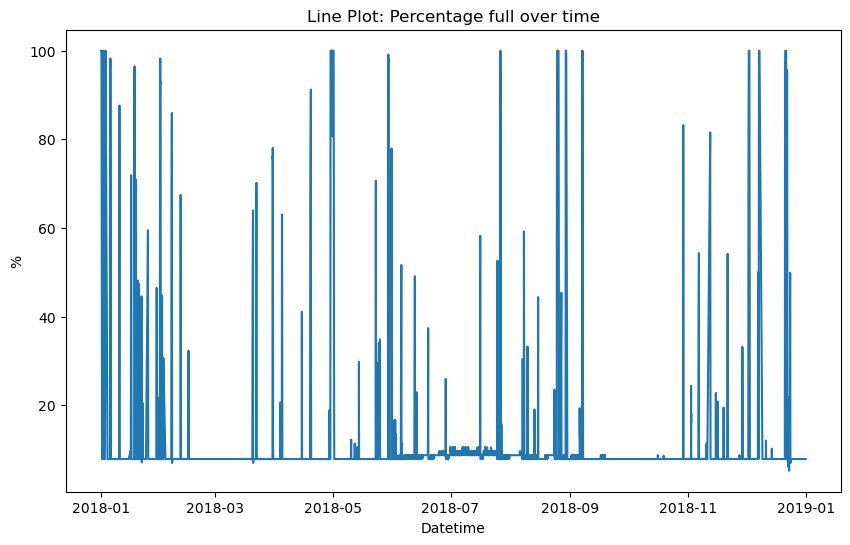

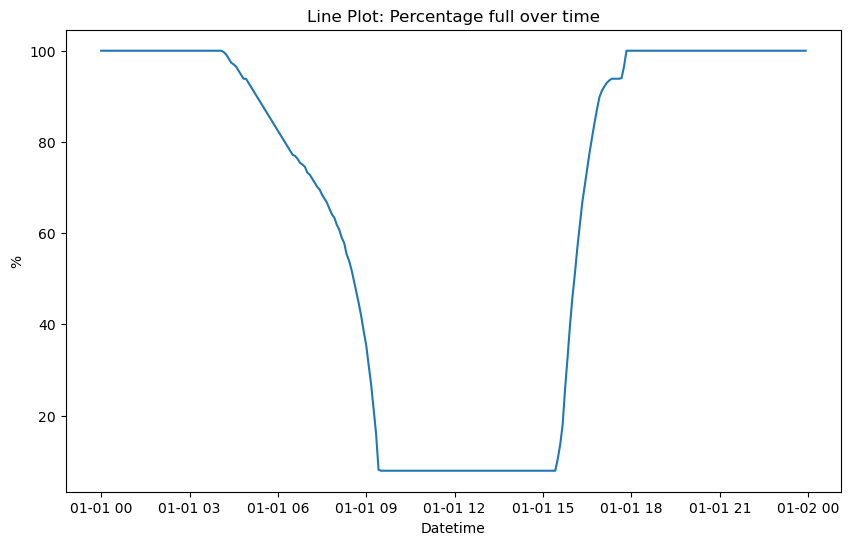

In [7]:
def create_plot(df, x,xlabel, y, ylabel, title):
    # Create a line plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x = x, y = y)

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display the plot
    plt.show()

df_2018 = df[df['timestamp'].dt.year == 2018]
df_jan_2018 = df[(df['timestamp'].dt.year == 2018) & (df['timestamp'].dt.month == 1) & (df['timestamp'].dt.day == 1)]

create_plot(df_2018, 'timestamp','Datetime', 'percentage','%', 'Line Plot: Percentage full over time')
create_plot(df_jan_2018, 'timestamp','Datetime', 'percentage','%', 'Line Plot: Percentage full over time')

In [8]:
df_weather = pd.read_parquet("try_map/polygon_1663.parquet")
df_weather.sort_values(by=['timestamp'], inplace=True)
df_weather.head()

,timestamp,polygon_1663
159,2023-01-01 00:00:00,0.01001
158,2023-01-01 00:05:00,0.01000
157,2023-01-01 00:10:00,0.00000
156,2023-01-01 00:15:00,0.00000
155,2023-01-01 00:20:00,0.00000


In [9]:
merged_df = pd.merge(df_weather, df, on='timestamp', how='left')
# Remove everything under 0 from the 'Column_Name' column
merged_df['polygon_1663'] = merged_df['polygon_1663'].apply(lambda x: x if x >= 0 else None)
# merged_df.to_parquet("data/rucphen_precipitation.parquet")
merged_df.head(10)
merged_df.to_parquet("data/rucphen_precipitation_clean.parquet")

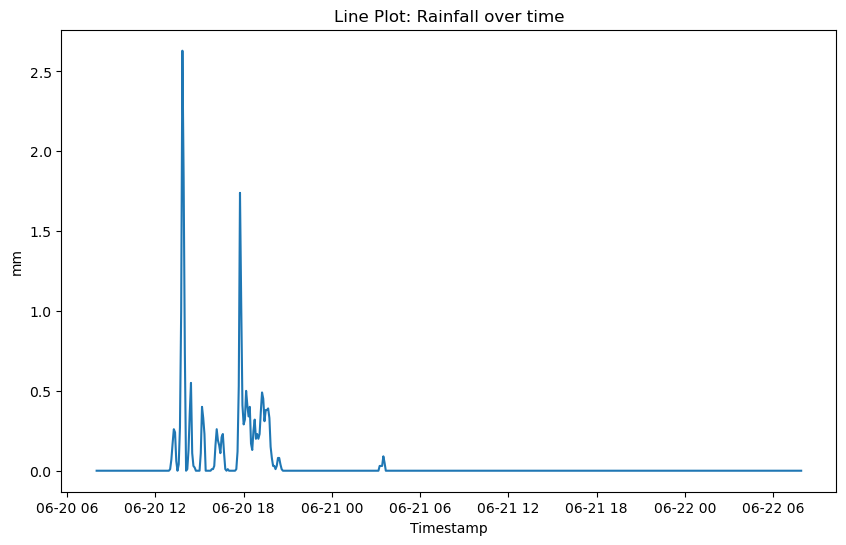

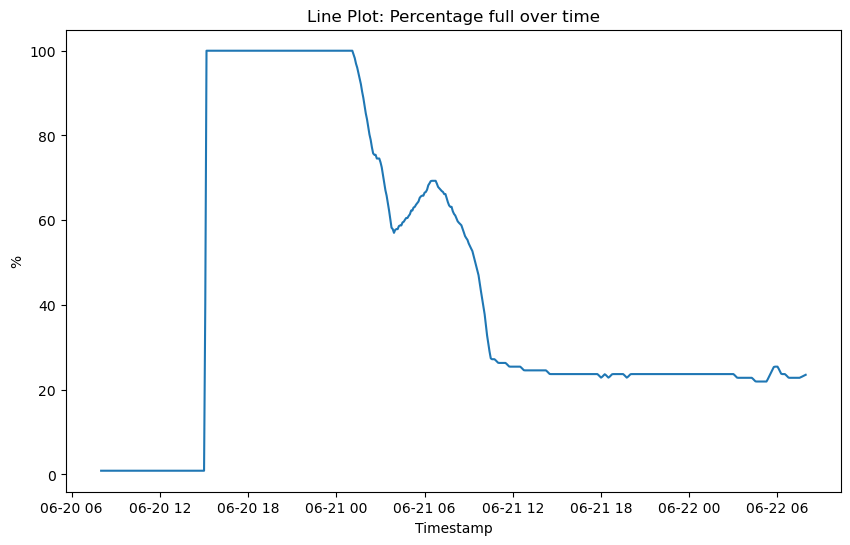

In [14]:
# Define the start and end timestamps
start_timestamp = pd.to_datetime('2023-06-20 8:00:00')
end_timestamp = pd.to_datetime('2023-06-22 8:00:00')

# Create a boolean mask for the specified time range
mask = (merged_df['timestamp'] >= start_timestamp) & (merged_df['timestamp'] < end_timestamp)

# Apply the mask to get the desired slice of the DataFrame
result_df = merged_df[mask]

create_plot(result_df, 'timestamp','Timestamp', 'polygon_1663','mm', 'Line Plot: Rainfall over time')
create_plot(result_df, 'timestamp','Timestamp', 'percentage','%', 'Line Plot: Percentage full over time')

In [11]:
result_df['polygon_1663'].sum()

40.790283203125